In [ ]:
import os
os.chdir("/content/drive/MyDrive/ML/sampleCode/weights")
!ls

weight.pth


epoch 調整成 20/40/60、batch size固定32、learning rate固定0.01

batch size調整成 8/16/32、epoch固定20、learning rate固定0.01

learning rate調整成 0.1/0.01/0.001、epoch固定20、batch size固定32

In [ ]:
!python /content/drive/MyDrive/ML/sampleCode/train.py
#!python train.py

Traceback (most recent call last):
  File "/content/drive/MyDrive/ML/sampleCode/train.py", line 65, in <module>
    loss.backward()
  File "/usr/local/lib/python3.7/dist-packages/torch/_tensor.py", line 255, in backward
    torch.autograd.backward(self, gradient, retain_graph, create_graph, inputs=inputs)
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/__init__.py", line 149, in backward
    allow_unreachable=True, accumulate_grad=True)  # allow_unreachable flag
KeyboardInterrupt
Training:  96% 81/84 [09:18<00:20,  6.89s/it]


In [52]:
!python /content/drive/MyDrive/ML/Cat_dog/test.py

Testing: 100% 500/500 [00:09<00:00, 50.15it/s]
Test accuracy: 74.3000%


In [51]:
!python /content/drive/MyDrive/ML/sampleCode/demo.py

python3: can't open file '/content/drive/MyDrive/ML/sampleCode/demo.py': [Errno 2] No such file or directory


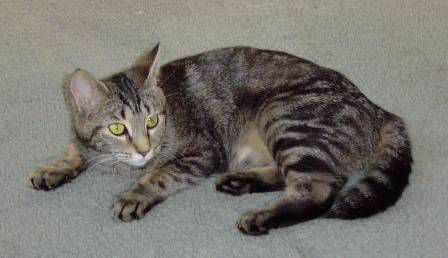

It is a CAT.


In [4]:
from PIL import Image
import torch
from models.model import MyCNN
from models.model import ExampleCNN
from torchvision import transforms
import os
from tqdm import tqdm
from PIL import Image
import IPython

test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

weight_path = "./weights/weight.pth"

# load model and use weights we saved before
#model = ExampleCNN()
model = MyCNN()
model.load_state_dict(torch.load(weight_path, map_location='cpu'))
model = model.to(device)

predict_correct = 0
model.eval()

def demo(img):
  img = test_transforms(img)
  img = img.view(1, 3, 224, 224)
  img = img.to(device)
  output = model(img)
  if(output.data.max(1)[1][0] == 0):
    print ("It is a CAT.")
  elif(output.data.max(1)[1][0] == 1):
    print ("It is a DOG.")


#demo("test3.jpg")
img_path = "./data/demo/test1.jpg"
img = Image.open(img_path)
display(img)
demo(img)

In [75]:
!python ./window.py

C:/Users/vivia/Desktop/Cat_dog/data/demo/test2.jpg
C:/Users/vivia/Desktop/Cat_dog/data/demo/test3.jpg
C:/Users/vivia/Desktop/Cat_dog/data/demo/test4.jpg
C:/Users/vivia/Desktop/Cat_dog/data/demo/test5.jpg
C:/Users/vivia/Desktop/Cat_dog/data/demo/test6.jpg
C:/Users/vivia/Desktop/Cat_dog/data/demo/test7.jpg
C:/Users/vivia/Desktop/Cat_dog/data/demo/test8.jpg
C:/Users/vivia/Desktop/Cat_dog/data/demo/test9.jpg
C:/Users/vivia/Desktop/Cat_dog/data/demo/test10.jpg
C:/Users/vivia/Desktop/Cat_dog/data/demo/test11.jpg
C:/Users/vivia/Desktop/Cat_dog/data/demo/test12.jpg


In [27]:
import tkinter as tk
from PIL import Image, ImageTk
from demo import demo
from tkinter import filedialog
from PIL import Image

window = tk.Tk()
window.title('CAT or DOG ?')
align_mode = 'nswe'
pad = 5
img_path = ''
img = None
CoD = ''
div_size = 300
img_size = div_size * 2

div1 = tk.Frame(window,  width=img_size , height=img_size , bg='blue')
div2 = tk.Frame(window,  width=div_size , height=div_size , bg='orange')
div3 = tk.Frame(window,  width=div_size , height=div_size , bg='green')

window.update()
win_size = min( window.winfo_width(), window.winfo_height())
print(win_size)

div1.grid(column=0, row=0, padx=pad, pady=pad, rowspan=2, sticky=align_mode)
div2.grid(column=1, row=0, padx=pad, pady=pad, sticky=align_mode)
div3.grid(column=1, row=1, padx=pad, pady=pad, sticky=align_mode)

def define_layout(obj, cols=1, rows=1):
    def method(trg, col, row):
        for c in range(cols):    
            trg.columnconfigure(c, weight=1)
        for r in range(rows):
            trg.rowconfigure(r, weight=1)
    if type(obj)==list:        
        [ method(trg, cols, rows) for trg in obj ]
    else:
        trg = obj
        method(trg, cols, rows)
        
# button event
def chooser_event():
    img_path = filedialog.askopenfilename()
    #img_path = "./data/demo/test1.jpg"
    img = Image.open(img_path)
    imTK = ImageTk.PhotoImage( img.resize( (img_size, img_size) ) )
    image_main = tk.Label(div1, image=imTK)
    image_main['height'] = img_size
    image_main['width'] = img_size
    image_main.grid(column=0, row=0, sticky=align_mode)

def start_event():
    #CoD = demo(img)
    CoD = 'CAT'
    
def reset_event():
    img_path = ''
    img = None
    CoD = ''
    
def quit_event():
    window.destroy()
    

define_layout(window, cols=2, rows=2)
define_layout([div1, div2, div3])

# image set
    

# word set
lbl_title1 = tk.Label(div2, text='This is a ...', bg='orange', fg='white')
lbl_title2 = tk.Label(div2, text=CoD, bg='orange', fg='white')

lbl_title1.grid(column=0, row=0, sticky=align_mode)
lbl_title2.grid(column=0, row=1, sticky=align_mode)

# button set
bt1 = tk.Button(div3, text='Choose File', bg='green', fg='white', command=chooser_event).pack()
bt2 = tk.Button(div3, text='Start', bg='green', fg='white', command=start_event).pack()
bt3 = tk.Button(div3, text='Reset', bg='green', fg='white', command=reset_event).pack()
bt4 = tk.Button(div3, text='Quit', bg='green', fg='white', command=quit_event).pack()

bt1.grid(column=0, row=0, sticky=align_mode)
bt2.grid(column=0, row=1, sticky=align_mode)
bt3.grid(column=0, row=2, sticky=align_mode)
bt4.grid(column=0, row=3, sticky=align_mode)


define_layout(window, cols=2, rows=2)
define_layout(div1)
define_layout(div2, rows=2)
define_layout(div3, rows=4)

window.mainloop()

200
